#  Distribuciones de probabilidad en Python

**Que es una variable aleatoria**

Es el resultado de un experimento aleatorio. Ejemplo, lanzar una moneda al aire. Los posibles resultados son cara o cruz, cada uno con 50% de probabilidad de ocurrir. Pero no sabremos realmente el resultado hasta que el experimento sea realizado.

Las distribuciones de probabilidad son una manera de mapear esas variables aleatorias. Existen dos tipos: variables aleatorias discretas y continuas

- Las variables discretas son aquellas que se pueden describir con valores finitos. Ejemplo, lanzar una moneda, lanzar un dado donde los unicos posibles resultados son 1,2,3,4,5 y 6. No se puede obtener 1.3 o 2.89.

- Las variables continuas pueden tomar valores infinitos. Ejemplo, la temperatura que podria tomar valores como 13, 13.5, 13.63... Entre 13 y 14 podriamos tener infinitos valores.

## Distribucion Uniforme

Aplica tanto para variables continuas como discretas. Todos los eventos tienen la misma probabilidad de ocurrir. Su grafica es uniforme y paralela al eje X.

Su funcion densidad de probabilidad viene dada por:
$$p(x) = \frac{1}{b-a}$$
en cualquier lugar dentro del intervalo $[a, b)$ y cero en cualquier otro lugar

In [1]:
# importar librerias
import numpy as np
import matplotlib.pyplot as plt

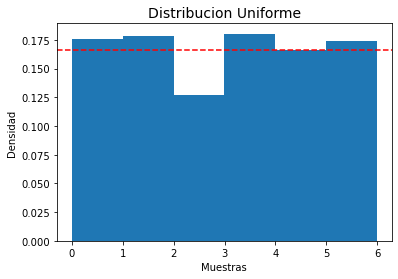

In [8]:
# Simulacion de un experimento con 1000 muestras entre 0 y 6
uniform_samples = np.random.uniform(low=0, high=6, size=1000)

# grafico
fig, ax = plt.subplots()
plt.hist(uniform_samples, density=True, bins=6)
plt.title('Distribucion Uniforme', size=14)
plt.xlabel('Muestras')
plt.ylabel('Densidad')
plt.axhline(
    1/6,   # ubicacion en el eje Y
    color='red', 
    linestyle='--'
);

Como el intervalo es de 0 a 6 y la distribucion es uniforme, entonces la probabilidad de ocurrencia es de 1/6 por lo que se traza la linea en ese valor. Al hacer la simulacion que es una aproximacion numerica, no todas las muestras estan por encima de la linea. Sin embargo, los valores son muy cercanos y se toman como validos 

## Distribucion binomial

Mapea los resultados de lanzar una moneda muchas veces. Lanzar una moneda una sola vez es un experimento de Bernoulli en lo que solo tienes dos posibles resultados, cada uno con una probabilidad asociada. Los eventos son independientes. Si repetimos el experimento de Bernoulli tendremos una D. binomial. La densidad de probabilidad de la D. binomial es:

$$P(N) = \binom{n}{N}p^{N}(1-p)^{n-N}$$

donde $n$ es el numero de ensayos, $p$ es la probabilidad de exito y $N$ es el numero de exitos.


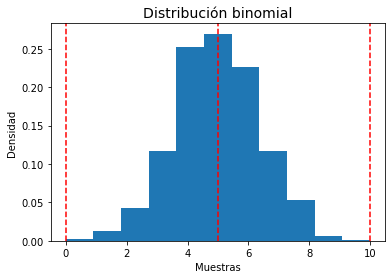

In [12]:
# simulacion de lanzar una moneda 10 veces
# El experimento se repite 1000 veces
# la probabilidad de exito es de 0.5
binomial_samples = np.random.binomial(10, 0.5, size=1000)

# grafico
fig, ax = plt.subplots()
plt.hist(binomial_samples, density=True, bins=11)
plt.title('Distribución binomial', size=14)
plt.xlabel('Muestras')
plt.ylabel('Densidad')
# linea de la probabilidad maxima de ocurrencia
plt.axvline(10*0.5, color='red', linestyle='--')
# linea de los limites
plt.axvline(0, color='red', linestyle='--')
plt.axvline(10, color='red', linestyle='--');

La grafica muestra que la probabilidad maxima de ocurrencia esta en el evento en el que $p*n$ se cumple. Es decir, multiplicamos la probabilidad de exito y el numero de lanzamientos. El rango de valores es igual al numero de lanzamientos, de 0 a 10.

**Una empresa perfora 9 pozos de exploración petrolera, cada uno con una probabilidad de éxito estimada de 0,1. Si los nueve pozos fallan. ¿Cuál es la probabilidad de que eso suceda?**

Hagamos 20.000 pruebas del modelo y contemos el numero que genera cero resultados positivos

In [13]:
sum(np.random.binomial(9, 0.1, 20000) == 0)/20000

0.3922

- Existe un 38% de probabilidad de que un evento como que los 9 pozos fallen, ocurra.

## Distribucion de Poisson

Es una distribucion discreta que permite expresar la probabilidad de que un numero de eventos ocurra en un lapso de tiempo siempre y cuando:
- Se conozca el tiempo promedio que pasa entre estos eventos
- Los eventos sean independientes entre si
La distribucion de Poisson viene dada por:

$$f(k;\lambda)=\frac{\lambda^{k}e^{-\lambda }}{k!}$$

Para eventos con una separacion esperada $\lambda$ la D. de Poisson $f(k;\lambda)$ describe la probabilidad de $k$ eventos que ocurren dentro del intervalo observado $\lambda$.

Supongamos que en un partido de futbol de 90 minutos, el promedio de goles es 3. Veamos su distribucion de probabilidad

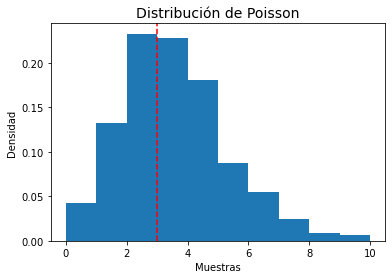

In [16]:
# simulacion de 1000 muestras
poisson_samples = np.random.poisson(3, 1000)

# grafico
fig, ax = plt.subplots()
plt.hist(poisson_samples, density=True, bins=10)
plt.title('Distribución de Poisson', size=14)
plt.xlabel('Muestras')
plt.ylabel('Densidad')
# linea de promedio de goles
plt.axvline(3, color='red', linestyle='--');

- La grafica muestra que se llega a un pico maximo de probabilidad en $\lambda = 3$

## Distribucion Exponencial

Una vez tenemos una distribución de Poisson, ¿cómo hacemos para obtener una distribución del tiempo entre estos eventos? Aquí aplicamos una distribución exponencial. Su funcion de densidad de probabilidad viene dada por:

$$f(x;\frac{1}{\beta }) = \frac{1}{\beta }e^{-\frac{x}{\beta }}$$

done $\beta$ es el parametro de escala, que es el inverso del parametro de velocidad $\lambda = 1/\beta$

Tomemos el ejemplo de los 3 goles por partido y veamos la distribucion 

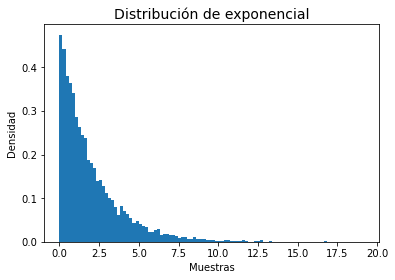

In [19]:
# simulacion para 10000 juegos de futbol
exponencial_samples = np.random.exponential(2, 10000)

# grafico
fig, ax = plt.subplots()
plt.hist(exponencial_samples, density=True, bins=100)
plt.title('Distribución de exponencial', size=14)
plt.xlabel('Muestras')
plt.ylabel('Densidad');

- Mientras mas partidos ocurren, la probabilidad de que se marquen 3 goles tiende al 100%

**supongamos que una empresa tiene 10.000 agentes de atención al cliente y el tiempo medio entre llamadas de clientes es de 4 minutos. ¿Cuál es la probabilidad de que un cliente llame en los próximos 4 a 5 minutos?**

In [20]:
# numero de agentes
n = 10000
# tiempo entre llamadas
time_between_calls = np.random.default_rng().exponential(scale=4, size=n)

In [21]:
x = ((time_between_calls < 5).sum())/n 
y = ((time_between_calls < 4).sum())/n
x-y

0.08429999999999993